In [3]:
import pandas as pd
import quantstats as qs

In [4]:
dados_empresas = pd.read_csv("dados_empresas.csv")

In [5]:
dados_empresas = dados_empresas[dados_empresas['volume_negociado'] > 1000000]

In [6]:
dados_empresas['retorno'] = dados_empresas.groupby('ticker')['preco_fechamento_ajustado'].pct_change()
dados_empresas['retorno'] = dados_empresas.groupby('ticker')['retorno'].shift(-1)

In [7]:
dados_empresas['ranking_ev_ebit'] = dados_empresas.groupby('data')['ebit_ev'].rank(ascending = False)
dados_empresas['ranking_roic'] = dados_empresas.groupby('data')['roic'].rank(ascending = False)

dados_empresas['ranking_final'] = dados_empresas['ranking_ev_ebit'] + dados_empresas['ranking_roic']
dados_empresas['ranking_final'] = dados_empresas.groupby('data')['ranking_final'].rank()

In [8]:
dados_empresas = dados_empresas[dados_empresas['ranking_final'] <= 10]
dados_empresas

,data,ticker,preco_fechamento_ajustado,volume_negociado,ebit_ev,roic,retorno,ranking_ev_ebit,ranking_roic,ranking_final
957,2016-03-31,ALSC3,12.45,6109292.0,0.22743,0.21115,0.201606,4.0,8.0,1.0
958,2016-04-30,ALSC3,14.96,5974473.0,0.18712,0.21115,-0.185160,6.0,8.0,1.0
959,2016-05-31,ALSC3,12.19,4164513.0,0.23420,0.21412,0.132896,4.0,7.0,2.0
960,2016-06-30,ALSC3,13.81,2583221.0,0.20543,0.21412,0.027516,4.0,7.0,2.0
961,2016-07-31,ALSC3,14.19,8624183.0,0.19963,0.21412,0.039464,3.0,8.0,2.0
...,...,...,...,...,...,...,...,...,...,...
34240,2018-06-30,VULC3,5.71,4993927.0,0.15874,0.25297,-0.092820,11.0,7.0,2.5
34241,2018-07-31,VULC3,5.18,5852761.0,0.17556,0.25297,-0.030888,7.0,6.0,2.0
34242,2018-08-31,VULC3,5.02,2394638.0,0.14699,0.21972,-0.073705,13.0,9.0,5.0
34243,2018-09-30,VULC3,4.65,1770684.0,0.15893,0.21972,0.234409,10.0,10.0,5.5


In [9]:
rentabilidade_por_carteiras = dados_empresas.groupby('data')['retorno'].mean()
rentabilidade_por_carteiras = rentabilidade_por_carteiras.to_frame()
rentabilidade_por_carteiras

,retorno
data,
2015-12-31,-0.069603
2016-01-31,0.155976
2016-02-29,0.218407
2016-03-31,0.111352
2016-04-30,-0.026688
...,...
2023-02-28,-0.057919
2023-03-31,0.001075
2023-04-30,0.029011


In [10]:
rentabilidade_por_carteiras['modelo'] = (rentabilidade_por_carteiras['retorno'] + 1).cumprod() - 1
rentabilidade_por_carteiras = rentabilidade_por_carteiras.shift(1)
rentabilidade_por_carteiras = rentabilidade_por_carteiras.dropna()
rentabilidade_por_carteiras

,retorno,modelo
data,,
2016-01-31,-0.069603,-0.069603
2016-02-29,0.155976,0.075516
2016-03-31,0.218407,0.310417
2016-04-30,0.111352,0.456335
2016-05-31,-0.026688,0.417469
...,...,...
2023-02-28,-0.091273,10.596140
2023-03-31,-0.057919,9.924500
2023-04-30,0.001075,9.936243


In [11]:
ibov = pd.read_csv('ibov.csv')

retornos_ibov = ibov['fechamento'].pct_change().dropna()
retorno_acum_ibov = (1 + retornos_ibov).cumprod() - 1
rentabilidade_por_carteiras['ibovespa'] = retorno_acum_ibov.values
rentabilidade_por_carteiras = rentabilidade_por_carteiras.drop('retorno', axis = 1)

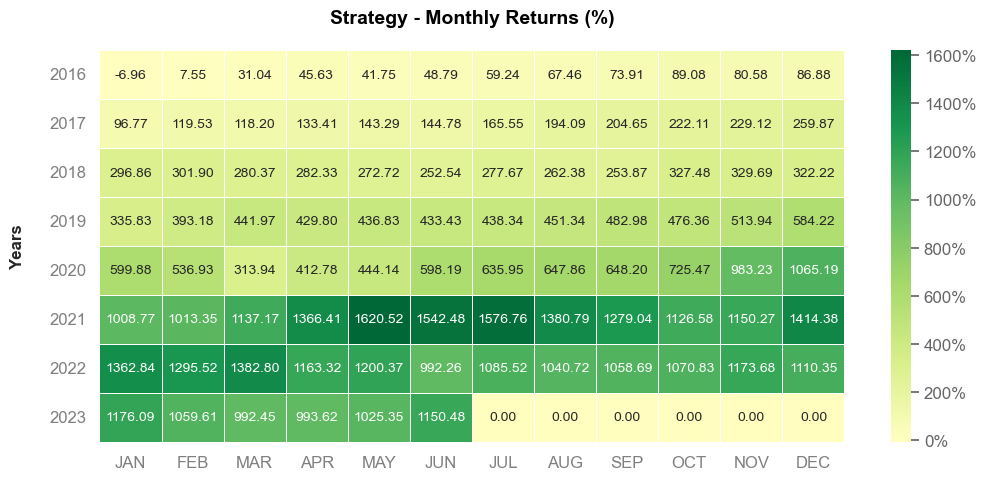

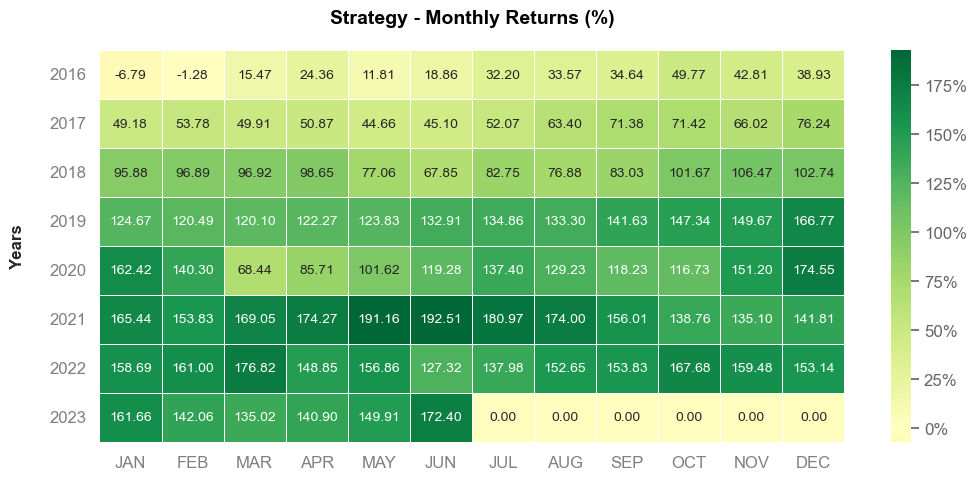

In [12]:
qs.extend_pandas()
rentabilidade_por_carteiras.index = pd.to_datetime(rentabilidade_por_carteiras.index)

rentabilidade_por_carteiras['modelo'].plot_monthly_heatmap()
rentabilidade_por_carteiras['ibovespa'].plot_monthly_heatmap()

<Axes: xlabel='data'>

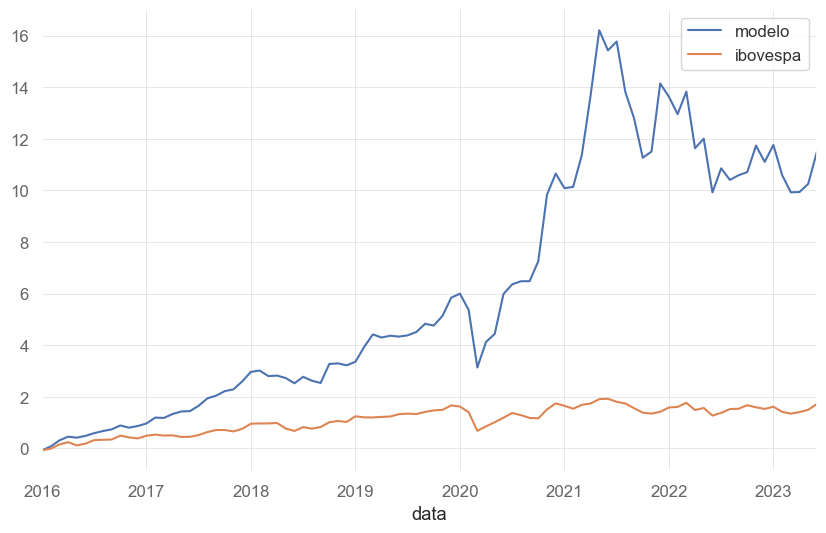

In [13]:
rentabilidade_por_carteiras.plot()

In [17]:
rentabilidade_ao_ano_modelo = (1 + rentabilidade_por_carteiras.loc['2023-06-30', 'modelo']) ** (1/7.5) - 1
rentabilidade_ao_ano_ibovespa = (1 + rentabilidade_por_carteiras.loc['2023-06-30', 'ibovespa']) ** (1/7.5) - 1
rentabilidade_ao_ano_ibovespa = rentabilidade_ao_ano_ibovespa * 100
rentabilidade_ao_ano_modelo = rentabilidade_ao_ano_modelo * 100
print(f'''A rentabilidade do Ibovespa ao ano foi de {rentabilidade_ao_ano_ibovespa.round(2)}%\n 
A rentabilidade do Modelo ao ano foi de {rentabilidade_ao_ano_modelo.round(2)}%''')
      
      
    

A rentabilidade do Ibocespa ao ano foi de 14.3%
 
A rentabilidade do modelo ao ano foi de 40.05%
